# Process DEM data

We need to access DEM data for Wellington region.

To do this we download the DEM data from the [Wellington region DEM 2013/14](https://data.linz.govt.nz/layer/53621-wellington-lidar-1m-dem-2013-2014/) for the area we are interested in. In this case have cropped and downloaded for Territorial Authorities = "Porirua City" and saved to folder `/spatial_data/linz_dem_2013_porirua` which is accessible by the project.


In [2]:
# Install support package and dependencies 
!pip install --upgrade -e ../.

# Ensure access to packge for imports
import sys
sys.path.append('../')

Obtaining file:///home/jovyan/work/osm/osmnx-catchments
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Attempting uninstall: osmcatch
    Found existing installation: osmcatch 0.0.1
    Uninstalling osmcatch-0.0.1:
      Successfully uninstalled osmcatch-0.0.1
  Running setup.py develop for osmcatch


In [2]:
from pathlib import Path

# Path to raster data 
dem_path = 'spatial_data/linz_dem_2013_porirua'
p = Path.home().joinpath(Path(dem_path))


True

In [56]:
import requests
import json
from shapely.geometry import shape
import geopandas as gpd

def get_local_authority_boundary(access_point,
                                    statsnz_api=None,
                                    statsnz_layer_code=104267):

    if statsnz_api is None:
        statsnz_api = 'e9dc37ccf1ef4152bb7444f61dcd2ceb'

    # StatsNZ base url
    url_template = "https://datafinder.stats.govt.nz/services/query/v1/vector.json?" + \
                   "key={}&layer={}&x={}&y={}&max_results=1&geometry=true&" + \
                   "with_field_names=true"

    
    # Query layer
    url = url_template.format(statsnz_api, statsnz_layer_code, access_point[1], access_point[0])       
    r = requests.get(url)

    if r.status_code == 200:
        result = r.json() 
        crs = result["vectorQuery"]["layers"][str(statsnz_layer_code)]['crs']['properties']['name']
        geom_result = result["vectorQuery"]["layers"][str(statsnz_layer_code)]["features"][0]["geometry"]       
        geom_shape = shape(json.loads(str(geom_result).replace("'", '"')))
        
        geom = gpd.GeoSeries(geom, crs=crs)
        
    else:    
        result = []
        geom = None
        
    return result, geom, crs

access_point = (-41.137575, 174.843478)
result, geom, crs = get_local_authority_boundary(access_point)


'EPSG:4326'

<AxesSubplot:>

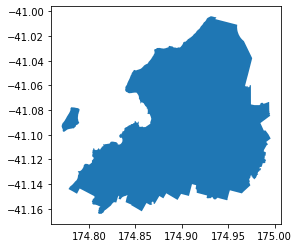

In [59]:




gs.plot()